In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the CSV file
df = pd.read_csv("IMDB Dataset.csv")

# Preview the data
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# 3. Basic Exploration
df.info()
df['sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [4]:
# 4. Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    return text

df['clean_review'] = df['review'].apply(clean_text)

In [5]:
# 5. TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})


In [6]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
# 7. Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
# 8. Predictions
y_pred = model.predict(X_test)


In [13]:
# 9. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



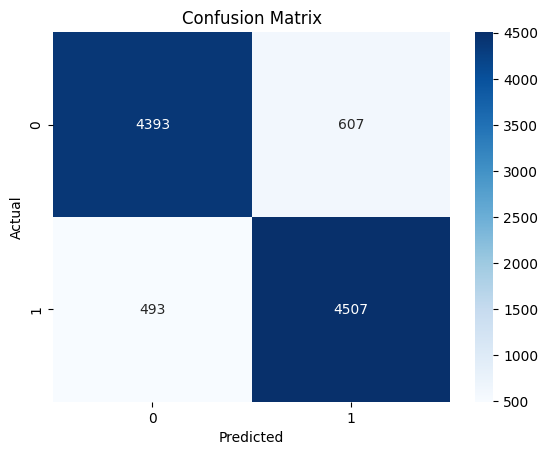

In [14]:
# 10. Confusion Matrix
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues' )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
# 11. Feature Importance (Top Words)
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]

top_positive = sorted(zip(coef, feature_names), reverse=True)[:10]
top_negative = sorted(zip(coef, feature_names))[:10]

print("Top Positive Words:")
for c, w in top_positive:
    print(w, round(c, 3))

print("\nTop Negative Words:")
for c, w in top_negative:
    print(w, round(c, 3))


Top Positive Words:
great 7.144
excellent 6.838
perfect 5.215
best 5.197
amazing 4.958
wonderful 4.833
loved 4.646
hilarious 4.436
enjoyed 4.284
favorite 4.266

Top Negative Words:
worst -9.975
waste -8.289
awful -7.807
bad -7.246
boring -6.299
poor -5.652
terrible -5.498
poorly -5.305
dull -5.228
worse -5.084


In [20]:
def predict_sentiment(text, model, vectorizer):
    """
    Predicts the sentiment of a single text review.

    Args:
        text (str): the review text
        model: trained ML model
        vectorizer: trained TF-IDF vectorizer

    Returns:
        str: 'Positive' or 'Negative'
    """
    # Clean the text (same as training)
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Convert text to TF-IDF vector
    vect_text = vectorizer.transform([text])

    # Predict sentiment
    pred = model.predict(vect_text)[0]

    return "Positive" if pred == 1 else "Negative"

In [21]:
comment1 = "I absolutely loliked ved this movie! It was fantastic and mezmerizing."
comment2 = "This movie was boring and way too long. I didn't enjoy it."

print(predict_sentiment(comment1, model, vectorizer))
print(predict_sentiment(comment2, model, vectorizer))


Positive
Negative


In [24]:
new_comments = [
    "An awesome film, highly recommended!",
    "Terrible movie, waste of time.",
    "It was okay, not bad but not great."
]

for c in new_comments:
    print(c, "->", predict_sentiment(c, model, vectorizer))

An awesome film, highly recommended! -> Positive
Terrible movie, waste of time. -> Negative
It was okay, not bad but not great. -> Negative
